In [1]:
# !pip install yfinance

In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add it to sys.path if not already there
if project_root not in sys.path:
    sys.path.append(project_root)

# Now you can import modules from the root
from data.market_data import MarketData


In [2]:

ticker = 'SPY'
start = '2015-01-01'
end = '2025-01-01'

market_data = MarketData(ticker, start, end)
market_data.fetch_data_yfinance()
market_data.feature_engineering()
market_data.validate_stationarity()

market_data.save_to_bigquery()

# market_data.save_to_parquet()



Fetching data for SPY...


c:\Users\fe_ma\Projects\quant-ai-lab\data\market_data.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
c:\Users\fe_ma\Projects\quant-ai-lab\data\market_data.py:79: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  self.data.to_gbq(



--- Statistical Validation (ADF Test) ---
ADF Statistic: -15.68325586656621
p-value: 1.4638949679137733e-28
SUCCESS: Time Series is Stationary (p < 0.05). Ready for GARCH/LSTM.

Uploading to BigQuery: market_data.SPY_processed...
Upload Complete.


In [10]:
import os
path = 'carpeta'
if path is None:
    path = "data"
else:
    path = os.path.join(path, "data")

# path = os.path.join(path, "market_data")
path

'carpeta\\data'

In [ ]:
# Import the helper function from our new source module
from src.utils import adf_test

# Run ADF test on Log Returns and Realized Volatility
print("Testing Log Returns (Expect Stationary):")
adf_test(processed_df['Log_Ret'], title='Log Returns')

# print("Testing Realized Volatility (Expect Non-Stationary or Stationary?):")
# adf_test(processed_df['Realized_Vol'], title='Realized Volatility')

Testing Log Returns (Expect Stationary):
Augmented Dickey-Fuller Test: Log Returns
ADF Test Statistic            -1.568024e+01
p-value                        1.475777e-28
# Lags Used                    9.000000e+00
Number of Observations Used    2.485000e+03
Critical Value (1%)           -3.432984e+00
Critical Value (5%)           -2.862704e+00
Critical Value (10%)          -2.567390e+00
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is STATIONARY

-------------------------------------------

Testing Realized Volatility (Expect Non-Stationary or Stationary?):
Augmented Dickey-Fuller Test: Realized Volatility
ADF Test Statistic               -4.975800
p-value                           0.000025
# Lags Used                      27.000000
Number of Observations Used    2467.000000
Critical Value (1%)              -3.433003
Critical Value (5%)              -2.862712
Critical Value (10%)             -2.567394
dtype: float64
Str

In [8]:
from src.models.baseline import GarchBaseline
garch = GarchBaseline(project_id="quant-ai-lab")
data = garch.load_data()
garch.train(data)
# garch.diagnose()
# garch.forecast_volatility()


# if __name__ == "__main__":
#     garch = GarchBaseline(project_id="quant-ai-lab")
#     data = garch.load_data()
#     garch.train(data)
#     garch.diagnose()
#     garch.forecast_volatility()


Fetching data from BigQuery...


c:\Users\fe_ma\Projects\quant-ai-lab\src\models\baseline.py:22: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id=self.project_id)


Training GARCH(1,1) on SPY...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3189.16
Distribution:                  Normal   AIC:                           6386.33
Method:            Maximum Likelihood   BIC:                           6409.62
                                        No. Observations:                 2495
Date:                Tue, Dec 09 2025   Df Residuals:                     2494
Time:                        11:55:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0879  1.471e-02  

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3189.16
Distribution:                  Normal   AIC:                           6386.33
Method:            Maximum Likelihood   BIC:                           6409.62
                                        No. Observations:                 2495
Date:                Tue, Dec 09 2025   Df Residuals:                     2494
Time:                        11:55:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0879  1.471e-02      5.979  2.249e-09 [5.911e-0

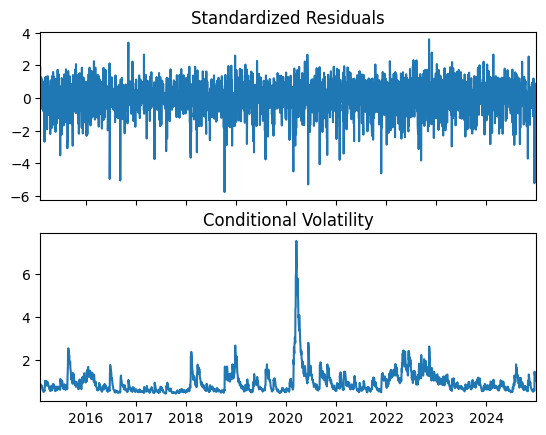

In [ ]:
garch.diagnose()

